<img src=https://upload.wikimedia.org/wikipedia/commons/6/68/Logo_universidad_icesi.svg width=300>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/sebastianb92/nlp-labs/blob/main/Session1/1-Spacy-Basics.ipynb)


# Maestría en Inteligencia Artificial  
## Procesamiento de Lenguaje natural
### Sesión 1 - Práctica

---


**Integrantes:**  
- Johan Sebastian Bonilla  
- Edwin Gómez  



# Caso práctico: Text Mining – FoodFast Delivery

FoodFast Delivery es una app de entrega de comida que recibe montones de comentarios de clientes y repartidores cada día.
El equipo de datos quiere automatizar el análisis de estos textos para poder:

- detectar las quejas más frecuentes

- encontrar segmentos de texto importantes

- extraer información clave (productos, ciudades, nombres)

- entender tendencias de los comentarios.

**Configurar entorno**

In [4]:
import pkg_resources
import warnings

warnings.filterwarnings('ignore')

installed_packages = [package.key for package in pkg_resources.working_set]
IN_COLAB = 'google-colab' in installed_packages

/tmp/ipython-input-2396000874.py:1: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources


In [1]:
!test "$IN_COLAB" = "True" && wget -q https://raw.githubusercontent.com/sebastianb92/nlp-labs/main/requirements.txt -O requirements.txt && pip install -r requirements.txt

Reiniciamos el entorno

In [3]:
!python -m spacy download es_core_news_sm

  Using cached https://github.com/explosion/spacy-models/releases/download/es_core_news_sm-3.8.0/es_core_news_sm-3.8.0-py3-none-any.whl (12.9 MB)
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import os
os.kill(os.getpid(), 9)

Para este caso trabajaremos con un documento en español

In [1]:
# RUN THIS CELL to perform standard imports:
import spacy
nlp = spacy.load('es_core_news_sm')

**1. Cargamos documento**

In [2]:
# Descargar el archivo correctamente
!wget -O comments.txt https://raw.githubusercontent.com/sebastianb92/nlp-labs/main/Session1/comments.txt


--2026-02-18 01:14:19--  https://raw.githubusercontent.com/sebastianb92/nlp-labs/main/Session1/comments.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2596 (2.5K) [text/plain]
Saving to: ‘comments.txt’

comments.txt        100%[===================>]   2.54K  --.-KB/s    in 0s      

2026-02-18 01:14:19 (51.2 MB/s) - ‘comments.txt’ saved [2596/2596]



Teniendo en cuenta que el archivo es un documento tabulado, hacemos el cargue por lineas

In [3]:
with open('comments.txt', 'r', encoding='utf-8') as file:
    comments = [line.strip() for line in file.readlines()]

docs = [nlp(comment) for comment in comments]

Mostramos los primeros 5 comentarios

In [4]:
docs[:5]

[Me llegó tarde la orden 😡 en Bogotá y la pizza estaba fría,
 Excelente servicio, repartidor muy amable 😊 en Medellín,
 No me respondieron por cobro doble 💳 en Cali,
 La app falla 📱 y no permite hacer seguimiento,
 La hamburguesa 🍔 llegó sin papas y fría]

**2. Cuantos comentarios (tokens) hay en el archivo?**

In [5]:
len(docs)

52

El archivo cuenta con 52 comentarios

**3. Cuantas oraciones hay en el archivo?**

In [6]:
for i, doc in enumerate(docs):
    print(f"Comentario {i}: {len(doc)} tokens, {len(list(doc.sents))} oraciones")


Comentario 0: 13 tokens, 1 oraciones
Comentario 1: 9 tokens, 1 oraciones
Comentario 2: 9 tokens, 1 oraciones
Comentario 3: 9 tokens, 1 oraciones
Comentario 4: 8 tokens, 1 oraciones
Comentario 5: 10 tokens, 1 oraciones
Comentario 6: 7 tokens, 1 oraciones
Comentario 7: 6 tokens, 1 oraciones
Comentario 8: 9 tokens, 1 oraciones
Comentario 9: 10 tokens, 1 oraciones
Comentario 10: 11 tokens, 1 oraciones
Comentario 11: 10 tokens, 1 oraciones
Comentario 12: 9 tokens, 1 oraciones
Comentario 13: 10 tokens, 1 oraciones
Comentario 14: 9 tokens, 1 oraciones
Comentario 15: 8 tokens, 1 oraciones
Comentario 16: 10 tokens, 1 oraciones
Comentario 17: 7 tokens, 1 oraciones
Comentario 18: 10 tokens, 1 oraciones
Comentario 19: 8 tokens, 1 oraciones
Comentario 20: 8 tokens, 1 oraciones
Comentario 21: 8 tokens, 1 oraciones
Comentario 22: 10 tokens, 2 oraciones
Comentario 23: 6 tokens, 1 oraciones
Comentario 24: 8 tokens, 1 oraciones
Comentario 25: 8 tokens, 1 oraciones
Comentario 26: 8 tokens, 1 oraciones
Co

**5. Por cada token en la oración anterior, imprime su text, POS tag, dep tag y lemma**

In [8]:
import pandas as pd

rows = []
for token in docs[0]:
    rows.append([token.text, token.pos_, token.dep_, token.lemma_])

pd.DataFrame(rows, columns=["Token","POS","Dep","Lemma"])

,Token,POS,Dep,Lemma
0,Me,PRON,iobj,yo
1,llegó,VERB,ROOT,llegar
2,tarde,ADV,advmod,tarde
3,la,DET,det,el
4,orden,NOUN,nsubj,orden
5,😡,VERB,amod,😡
6,en,ADP,case,en
7,Bogotá,PROPN,obl,Bogotá
8,y,CCONJ,cc,y
9,la,DET,det,el


**5) Extracción de frases nominales y entidades**

In [9]:
for doc in docs:
    print("Entidades:", [(ent.text, ent.label_) for ent in doc.ents])
    print("Noun chunks:", [chunk.text for chunk in doc.noun_chunks])

Entidades: [('Bogotá', 'LOC')]
Noun chunks: ['la orden 😡 en Bogotá', 'la pizza']
Entidades: [('Medellín', 'LOC')]
Noun chunks: ['Excelente servicio, repartidor', '😊', 'Medellín']
Entidades: [('Cali', 'LOC')]
Noun chunks: ['me', 'cobro doble', 'Cali']
Entidades: [('📱', 'ORG')]
Noun chunks: ['La app falla 📱', 'seguimiento']
Entidades: [('🍔 llegó', 'PER')]
Noun chunks: ['La hamburguesa 🍔', 'papas']
Entidades: [('llegó', 'PER')]
Noun chunks: ['Muy buena experiencia', 'todo rápido y caliente']
Entidades: [('Juan', 'PER')]
Noun chunks: ['El repartidor', 'Juan']
Entidades: []
Noun chunks: ['mi pedido 🚫', 'aviso']
Entidades: []
Noun chunks: ['La pizza']
Entidades: []
Noun chunks: ['El cobro', 'dos veces', '💳', 'nadie']
Entidades: []
Noun chunks: ['el pedido', 'varias veces']
Entidades: []
Noun chunks: ['🥗', 'con mal olor']
Entidades: []
Noun chunks: ['Buen servicio', 'el repartidor', '👏']
Entidades: []
Noun chunks: ['la app', 'nada']
Entidades: [('Llegó', 'PER'), ('🥤', 'ORG')]
Noun chunks: ['e

In [10]:
from spacy.matcher import Matcher

matcher = Matcher(nlp.vocab)

patterns = [
    [{"LEMMA": "llegar"}, {"LOWER": "tarde"}],
    [{"LEMMA": "cobrar"}, {"LOWER": "doble"}],
    [{"LEMMA": "fallar"}],
    [{"LEMMA": "no"}, {"POS": "VERB"}]
]

matcher.add("QUEJAS", patterns)


In [11]:
def report_insights(docs):
    complaints = []
    for doc in docs:
        matches = matcher(doc)
        if matches:
            complaints.append(doc.text)
    return complaints

print(report_insights(docs))


['Me llegó tarde la orden 😡 en Bogotá y la pizza estaba fría', 'La app falla 📱 y no permite hacer seguimiento', 'No funciona la app, no pude pedir nada 😕', 'El repartidor no encontró la dirección 😓 y demoró mucho', 'El soporte no responde los mensajes 💬❌', 'El repartidor fue amable pero llegó tarde 😕', 'El repartidor no tenía cambio, mala experiencia 😠', 'Llegó tarde, la app no notificó el retraso ⏰']


📌 “¿Cuál es la ciudad con más quejas?”

📌 “¿Cuáles son los productos mencionados más frecuentemente con quejas?”

📌 “¿Qué porcentaje de comentarios son negativos?”

barras de frecuencia de palabras

wordcloud de quejas

Pie chart de tipos de quejas

In [12]:
import spacy
from collections import Counter

nlp = spacy.load('es_core_news_sm')

# Supongamos que ya tienes tus comentarios
# comments = [...]  # lista de comentarios

# Contador de ciudades
cities_counter = Counter()

for comment in comments:
    doc = nlp(comment)
    for ent in doc.ents:
        if ent.label_ == "LOC" or ent.label_ == "GPE":  # ciudades o lugares
            cities_counter[ent.text] += 1

# Mostrar las ciudades con más menciones
most_common_cities = cities_counter.most_common(5)
print("Ciudades con más quejas:")
for city, count in most_common_cities:
    print(f"{city}: {count} quejas")


Ciudades con más quejas:
Bogotá: 1 quejas
Medellín: 1 quejas
Cali: 1 quejas
💬: 1 quejas
😡: 1 quejas


In [13]:
import spacy
from collections import Counter

nlp = spacy.load("es_core_news_sm")
noun_counter = Counter()

for comment in comments:
    doc = nlp(comment)
    for token in doc:
        if token.pos_ == "NOUN":
            noun_counter[token.lemma_.lower()] += 1  # usamos lemma para agrupar variantes

# Top 10 productos mencionados
for noun, count in noun_counter.most_common(10):
    print(f"{noun}: {count}")


repartidor: 9
servicio: 6
pedido: 6
comida: 5
experiencia: 3
bebida: 3
fría: 3
😊: 2
cobro: 2
hamburguesa: 2


In [14]:
neg_words = ["tarde", "fría", "demorado", "cancelado", "no funciona", "grosero", "perdió", "mal", "incorrecto", "derramada", "esperar", "pésimo"]


In [15]:
neg_count = 0

for comment in comments:
    if any(word in comment.lower() for word in neg_words):
        neg_count += 1

total_comments = len(comments)
percent_negative = (neg_count / total_comments) * 100
print(f"Comentarios negativos: {percent_negative:.2f}%")


Comentarios negativos: 40.38%


In [19]:
import spacy
from collections import Counter

nlp = spacy.load("es_core_news_sm")

# comments = [...]  # lista de comentarios

# Contador de palabras
word_counter = Counter()

for comment in comments:
    doc = nlp(comment)
    for token in doc:
        # Solo palabras reales, sin puntuación ni espacios
        if token.is_alpha and not token.is_stop:
            word_counter[token.lemma_.lower()] += 1


In [20]:
top_n = 20
most_common_words = word_counter.most_common(top_n)
words, counts = zip(*most_common_words)


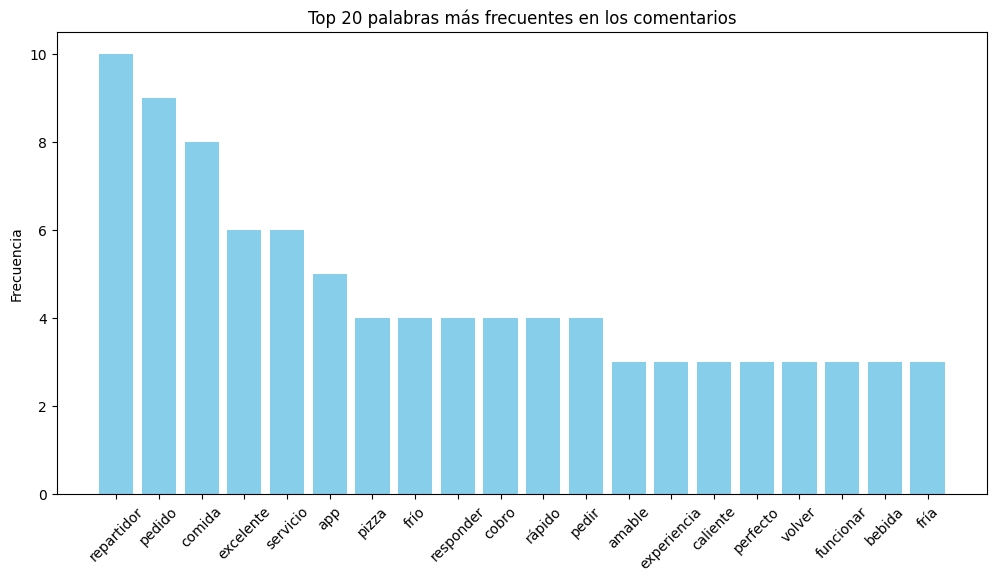

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.bar(words, counts, color='skyblue')
plt.xticks(rotation=45)
plt.title("Top 20 palabras más frecuentes en los comentarios")
plt.ylabel("Frecuencia")
plt.show()


In [22]:
!pip install wordcloud matplotlib


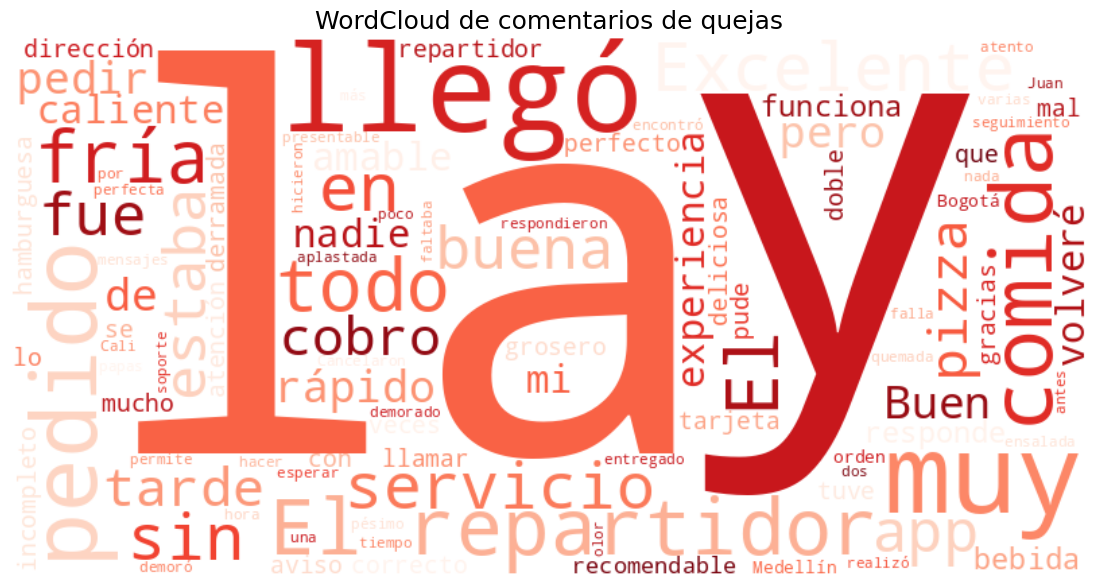

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenamos todos los comentarios en un solo string
text = " ".join(comments)

# Creamos el WordCloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color="white",
    colormap="Reds",       # colores tipo quejas
    max_words=100,         # máximo número de palabras a mostrar
    stopwords=None         # si quieres, spaCy stopwords
).generate(text)

# Mostrar el WordCloud
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud de comentarios de quejas", fontsize=18)
plt.show()


In [24]:
import spacy
nlp = spacy.load("es_core_news_sm")

stopwords = nlp.Defaults.stop_words

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color="white",
    colormap="Reds",
    max_words=100,
    stopwords=stopwords
).generate(text)


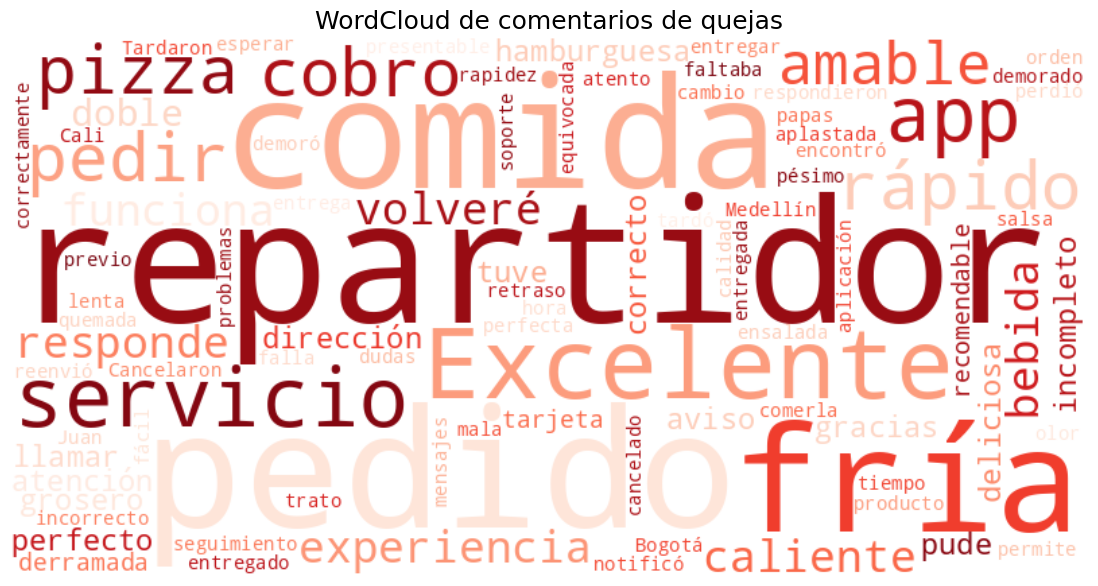

In [25]:
# Mostrar el WordCloud
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud de comentarios de quejas", fontsize=18)
plt.show()

In [26]:
import re
from collections import Counter

categories = {
    "Retrasos": ["tarde", "demorado", "esperar", "retraso", "hora", "lento"],
    "Comida / Calidad": ["fría", "quemada", "aplastada", "mal olor", "derramada", "caliente", "deliciosa"],
    "Pago / Cobro": ["cobro", "tarjeta", "incorrecto", "doble"],
    "Entrega incompleta": ["faltaba", "incompleto", "perdió", "cancelado"],
    "Repartidor / Atención": ["grosero", "amable", "soporte", "no responde", "atento"],
}

# Contador de tipos de quejas
category_counter = Counter()

for comment in comments:
    comment_lower = comment.lower()
    matched = False
    for cat, keywords in categories.items():
        for kw in keywords:
            if kw in comment_lower:
                category_counter[cat] += 1
                matched = True
                break
        if matched:
            break
    if not matched:
        category_counter["Otros"] += 1

print(category_counter)


Counter({'Otros': 20, 'Comida / Calidad': 13, 'Retrasos': 6, 'Repartidor / Atención': 5, 'Pago / Cobro': 4, 'Entrega incompleta': 4})


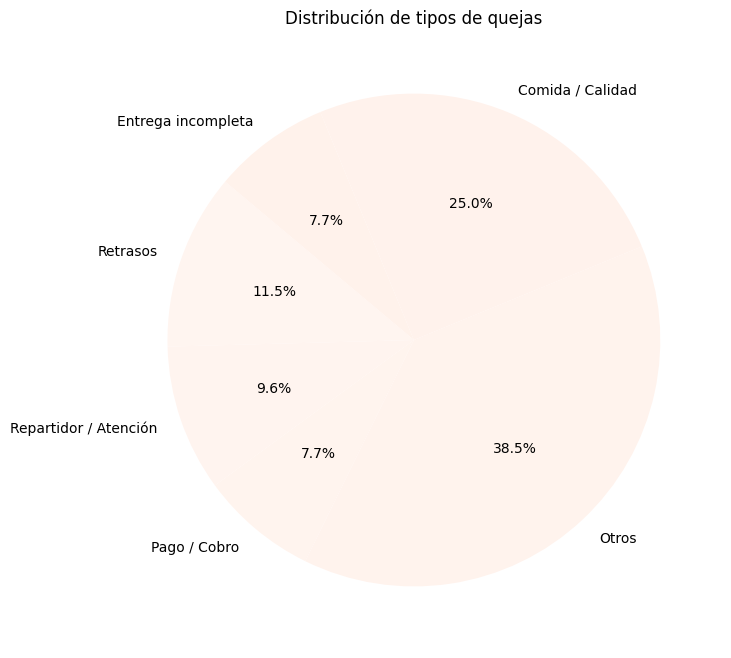

In [27]:
import matplotlib.pyplot as plt

labels = list(category_counter.keys())
sizes = list(category_counter.values())

plt.figure(figsize=(8,8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Reds(range(len(labels)*20)))
plt.title("Distribución de tipos de quejas")
plt.show()
